In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data['text'] = data['title']

data['sentiment'] = [1 if i % 2 == 0 else 0 for i in range(len(data))]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'].fillna(''))
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.41      0.45       988
           1       0.48      0.56      0.52       978

    accuracy                           0.48      1966
   macro avg       0.48      0.48      0.48      1966
weighted avg       0.48      0.48      0.48      1966



<ipython-input-12-291d453e7738>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


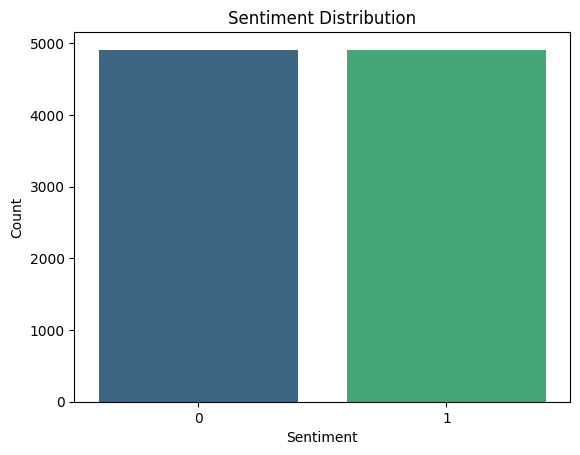

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


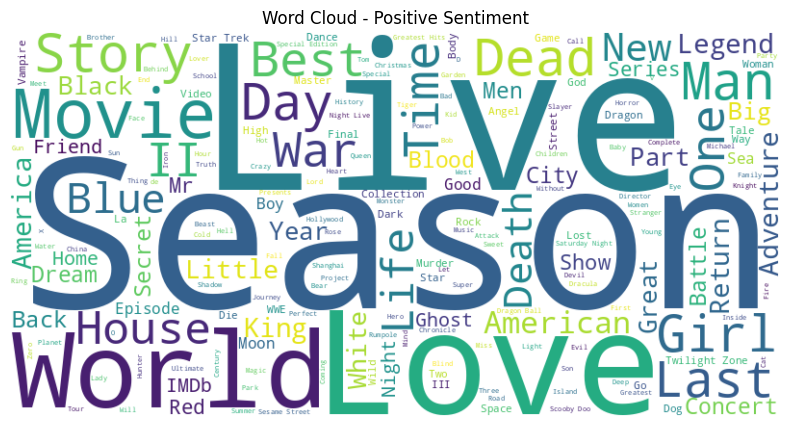

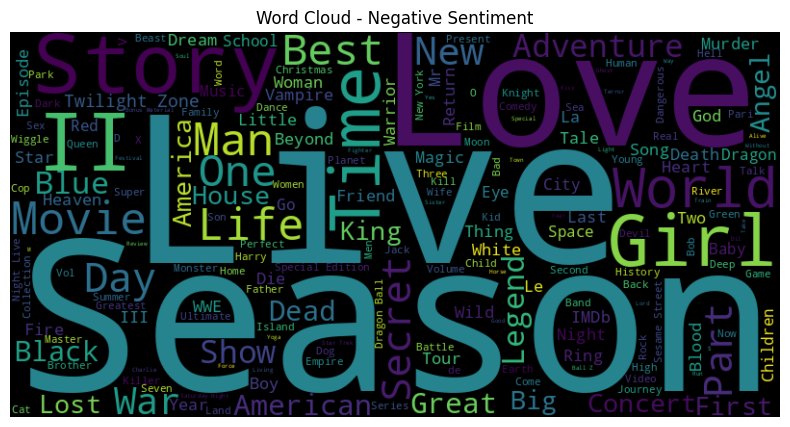

In [ ]:
from wordcloud import WordCloud

positive_text = ' '.join(data[data['sentiment'] == 1]['text'].fillna(''))  # Change 'positive' to 1
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

negative_text = ' '.join(data[data['sentiment'] == 0]['text'].fillna(''))  # Change 'negative' to 0
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()
